# EDA

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
from scipy import io
import os
from scipy import signal

In [4]:
#load dataset
#3 patients, pre and post stroke

path = r"C:\Users\simon\Documents\BCIData\DataComp"

P1_pre_training = io.loadmat(path + '\P1_pre_training.mat')
P1_post_training = io.loadmat(path + '\P1_post_training.mat')
P1_pre_test = io.loadmat(path + '\P1_pre_test.mat')
P1_post_test = io.loadmat(path + '\P1_post_test.mat')

P2_pre_training = io.loadmat(path + '\P2_pre_training.mat')
P2_post_training = io.loadmat(path + '\P2_post_training.mat')
P2_pre_test = io.loadmat(path + '\P2_pre_test.mat')
P2_post_test = io.loadmat(path + '\P2_post_test.mat')

P3_pre_training = io.loadmat(path + '\P3_pre_training.mat')
P3_post_training = io.loadmat(path + '\P3_post_training.mat')
P3_pre_test = io.loadmat(path + '\P3_pre_test.mat')
P3_post_test = io.loadmat(path + '\P3_post_test.mat')

In [5]:
#labels
label_P1_pre_training=P1_pre_training['trig']
label_P1_pre_training

array([[ 0],
       [ 0],
       [ 0],
       ...,
       [-1],
       [-1],
       [-1]], dtype=int16)

In [6]:
(unique, counts) = np.unique(P1_pre_training['trig'], return_counts=True)
frequencies = np.asarray((unique, counts)).T
frequencies

array([[    -1,  79889],
       [     0, 110007],
       [     1,  81920]], dtype=int64)

## Start with P1_pre_training
### Preprocessing (prepare samples and cut 0)

In [7]:
x=P1_pre_training['y'][:,:]
np.shape(x)

(271816, 16)

In [8]:
x=signal.detrend(x)
np.shape(x)

(271816, 16)

In [9]:
#cut the zeros
samples0=[]       #set of examples, each matrix represent a trial (59 channels X interval time)
labels0=[]

for i in range(len(label_P1_pre_training)):
    if label_P1_pre_training[i][0]!=0:
        labels0.append(label_P1_pre_training[i][0])
        samples0.append(x[i])

In [10]:
np.shape(samples0), np.shape(labels0), set(labels0)

((161809, 16), (161809,), {-1, 1})

In [11]:
#P1_pre_training
"""
t = range(161809)        
for i in range(16):
    
    x=(np.transpose(samples0))[i]
    
    plt.figure(figsize=(30,10))
    plt.plot(t,x)
    plt.show()
""";

In [12]:
np.shape(np.transpose(np.array(samples0)))

(16, 161809)

In [13]:
times=range(0,np.shape(samples0)[0]-17,2048)
samples=[]                                      #set of examples, each matrix represent a trial (59 channels X interval time)
labels=[]
for i in times:
    samples.append(np.transpose(np.array(samples0))[:,i:i+2048])  
    labels.append(labels0[i])

In [14]:
np.shape(samples), np.shape(labels) #set(labels)

((79, 16, 2048), (79,))

In [15]:
samples = np.asarray(samples)

## Spatial Weights Construction

In [279]:
import libpysal.weights as lp 
import geopandas as gpd

In [280]:
path = r"C:\Users\simon\Documents\BCI\BCIStrokeRehab\Data\electrode_network"

In [281]:
x_elect = np.loadtxt(path + "x_pos_electrodes.txt")
y_elect = np.loadtxt(path + "y_pos_electrodes.txt")
elect_name = np.loadtxt(path + "name_comp_electrodes.txt",dtype = "str")

In [282]:
# 9 cm (average) human head radius
# spherical projection
radius = 0.9 
lat_elect = np.sin((np.sqrt(radius*radius - x_elect*x_elect - y_elect*y_elect)/radius))
lon_elect = np.arctan2(y_elect, x_elect)

In [283]:
data_df ={"el_name":elect_name,"xpos": x_elect, "ypos":y_elect, "lat": lat_elect, "lon":lon_elect}
elect = pd.DataFrame(data = data_df)

In [284]:
"""
geo_elect = gpd.GeoDataFrame(
    elect, geometry=gpd.points_from_xy(elect.lat, elect.lon))

"""
geo_elect = gpd.GeoDataFrame(
            elect, geometry=gpd.points_from_xy(elect.xpos, elect.ypos))



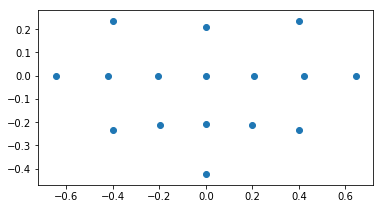

In [285]:
geo_elect.plot()

In [286]:
# bandwidth -> minimum number that considers a non-negative weight from electrode 4 (5) to 9 (10)
gaussian_kernel = lp.Kernel.from_dataframe(geo_elect, function = "gaussian", bandwidth = 1.3)
#gaussian_kernel = lp.Kernel.from_dataframe(geo_elect, function = "gaussian", bandwidth = 5.8)

In [287]:
flat_weights_g0 = gaussian_kernel.sparse[0].toarray().flatten()
flat_weights_g1 = gaussian_kernel.sparse[1].toarray().flatten()
flat_weights_g2 = gaussian_kernel.sparse[2].toarray().flatten()
flat_weights_g3 = gaussian_kernel.sparse[3].toarray().flatten()
flat_weights_g4 = gaussian_kernel.sparse[4].toarray().flatten()
flat_weights_g5 = gaussian_kernel.sparse[5].toarray().flatten()
flat_weights_g6 = gaussian_kernel.sparse[6].toarray().flatten()
flat_weights_g7 = gaussian_kernel.sparse[7].toarray().flatten()
flat_weights_g8 = gaussian_kernel.sparse[8].toarray().flatten()
flat_weights_g9 = gaussian_kernel.sparse[9].toarray().flatten()
flat_weights_g10 = gaussian_kernel.sparse[10].toarray().flatten()
flat_weights_g11 = gaussian_kernel.sparse[11].toarray().flatten()
flat_weights_g12 = gaussian_kernel.sparse[12].toarray().flatten()
flat_weights_g13 = gaussian_kernel.sparse[13].toarray().flatten()
flat_weights_g14 = gaussian_kernel.sparse[14].toarray().flatten()
flat_weights_g15 = gaussian_kernel.sparse[15].toarray().flatten()

In [288]:
# normalization
flat_weights_g0 = flat_weights_g0/flat_weights_g0.max()
flat_weights_g1 = flat_weights_g1/flat_weights_g1.max()
flat_weights_g2 = flat_weights_g2/flat_weights_g2.max()
flat_weights_g3 = flat_weights_g3/flat_weights_g3.max()
flat_weights_g4 = flat_weights_g4/flat_weights_g4.max()
flat_weights_g5 = flat_weights_g5/flat_weights_g5.max()
flat_weights_g6 = flat_weights_g6/flat_weights_g6.max()
flat_weights_g7 = flat_weights_g7/flat_weights_g7.max()
flat_weights_g8 = flat_weights_g8/flat_weights_g8.max()
flat_weights_g9 = flat_weights_g9/flat_weights_g9.max()
flat_weights_g10 = flat_weights_g10/flat_weights_g10.max()
flat_weights_g11 = flat_weights_g11/flat_weights_g11.max()
flat_weights_g12 = flat_weights_g12/flat_weights_g12.max()
flat_weights_g13 = flat_weights_g13/flat_weights_g13.max()
flat_weights_g14 = flat_weights_g14/flat_weights_g14.max()
flat_weights_g15 = flat_weights_g15/flat_weights_g15.max()

In [289]:
# adjacency matrix
adj_matrix = np.array((flat_weights_g0,flat_weights_g1, flat_weights_g2, flat_weights_g3,
                       flat_weights_g4,flat_weights_g5, flat_weights_g6, flat_weights_g7,
                       flat_weights_g8,flat_weights_g9, flat_weights_g10, flat_weights_g11,
                       flat_weights_g12,flat_weights_g13, flat_weights_g14, flat_weights_g15))

In [291]:
#np.savetxt("adj_matrix_planar.txt",adj_matrix)

## Network 

In [292]:
import networkx as nx 

In [293]:
spher_adj = np.loadtxt(r"C:/Users/simon/Documents/BCI/BCIStrokeRehab/Data/electrode_network/adj_matrix_spherical.txt")

In [324]:
spher_adj.shape

(16, 16)

In [326]:
np.savetxt("adj_final.csv",spher_adj, delimiter = ",")

In [299]:
node_labels = elect_name
spher_adj_df = pd.DataFrame(spher_adj, index=node_labels, columns=node_labels)

In [303]:
el_net = nx.from_pandas_adjacency(spher_adj_df)

In [306]:
def mergeDict(dict1, dict2):
    ''' Merge dictionaries and keep values of common keys in list'''
    dict3 = {**dict1, **dict2}
    for key, value in dict3.items():
        if key in dict1 and key in dict2:
            dict3[key] = tuple([value , dict1[key]])
    return dict3

In [314]:
x_pos = dict(zip(node_labels, x_elect))
y_pos = dict(zip(node_labels, y_elect))
pos = mergeDict(y_pos, x_pos)

In [315]:
nx.set_node_attributes(el_net, pos, "pos")

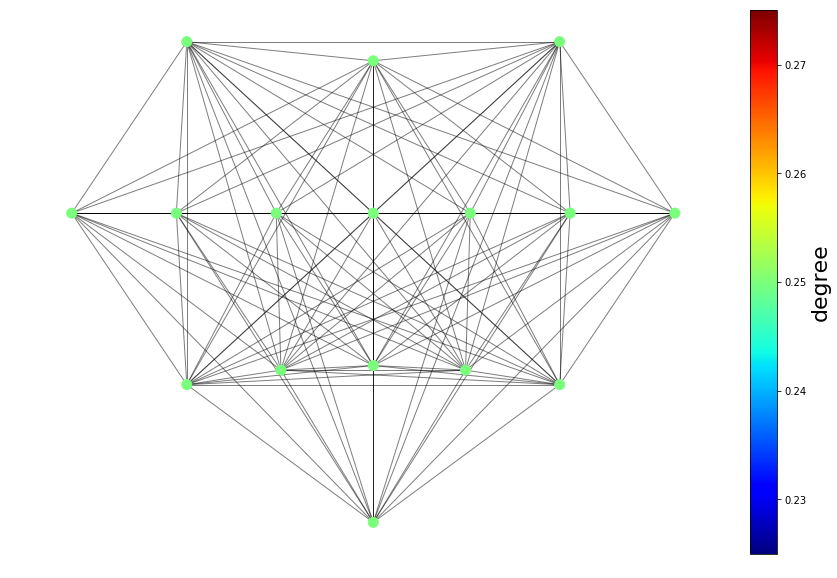

In [319]:
plt.figure(figsize=(15,10))

s=nx.draw_networkx_nodes(el_net,
            pos,
            node_size=100.0,
            node_color=list(dict(nx.eigenvector_centrality(el_net)).values()),
            alpha=1,
            cmap=plt.cm.jet
            )

nx.draw_networkx_edges(el_net, pos, alpha=0.5)

#show the colorbar on the right side
cbar=plt.colorbar(s)
cbar.ax.set_ylabel('degree', size=22)

plt.axis('off')
#plt.savefig("Italia_Munic_Net.jpg", dpi = 900, quality = 95)
plt.show()